In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Files = ['2024/MetodosII.xlsx']
df = pd.read_excel(Files[0])
# Agregamos un valor temporal a las notas faltantes
#df = df.fillna(4.0) 
#df

In [3]:
df.keys()

Index(['Username', 'Last Name', 'First Name', 'Email', 'Parcial 1',
       'Parcial 2', 'Parcial 3', 'Tarea 1', 'Tarea 2', 'Tarea 3', 'Tarea 4',
       'Tarea 5'],
      dtype='object')

In [4]:
dfparciales = df[['Parcial 1','Parcial 2','Parcial 3']]
dftalleres = df[['Tarea 1','Tarea 2','Tarea 3','Tarea 4','Tarea 5']]

In [5]:
df = df.assign( Talleres = dftalleres.mean(axis=1) )
df = df.assign( Parciales = dfparciales.mean(axis=1))

In [6]:
df[['Talleres','Parciales']]

,Talleres,Parciales
0,4.660,4.986667
1,4.076,4.316667
2,3.886,4.403333
3,5.000,4.843333
4,4.364,4.000000
5,4.002,4.526667
6,4.552,4.000000
7,4.468,4.986667
8,4.058,4.366667
9,4.518,4.270000


In [7]:
# ponderación acordada
df = df.assign( NotaFinal = np.round( df.Parciales*0.6+df.Talleres*0.4,2) ) 
#df

In [8]:
dffinal = df[['Last Name','First Name', 'NotaFinal']]
dffinal
#dffinal.sort_values(by='NotaFinal')

,Last Name,First Name,NotaFinal
0,Andrade Hernandez,Thomas,4.86
1,Anzola Aldana,Juan David,4.22
2,Ardila Tapiero,Johan Stivens,4.20
3,Arias Velasquez,Andres Felipe,4.91
4,Avila Restrepo,Isabela,4.15
5,Ballesteros Lopez,Bryan Andres,4.32
6,Barreto Roa,Daniel Steven,4.22
7,Camelo Bernal,Juan Felipe,4.78
8,Castellanos Mosquera,Ana Sofia,4.24
9,Corredor Lozano,Daniel Mauricio,4.37


In [9]:
dffinal.to_excel('Metodos2.xlsx',index=False)

/tmp/ipykernel_7852/2066457746.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Métodos computacionales 1'], rotation=1, fontsize=15)


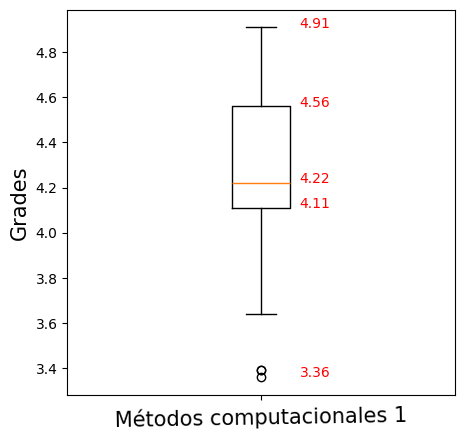

In [10]:
percentiles = np.percentile(dffinal.NotaFinal,[0,25,50,75,100])



fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.set_xticklabels(['Métodos computacionales 1'], rotation=1, fontsize=15)

ax.boxplot(dffinal.NotaFinal)
ax.set_ylabel('Grades', fontsize=15)

for i in range(len(percentiles)):
    ax.text(1+0.1,percentiles[i],np.round(percentiles[i],2),color='r')